In [1]:
import numpy as np

def minkowski_distance(x, y, p):
    # Ensure the vectors have equal length
    assert len(x) == len(y)
    
    # Calculate the absolute differences raised to the power of p
    abs_diff = np.abs(x - y)
    abs_diff_p = np.power(abs_diff, p)
    
    # Sum the powered absolute differences and take the p-th root
    distance = np.power(np.sum(abs_diff_p), 1/p)
    
    return distance

# Example usage
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])
p = 2  # Order of Minkowski distance (2 for Euclidean distance)

distance = minkowski_distance(x, y, p)
print("Minkowski distance:", distance)


Minkowski distance: 5.196152422706632


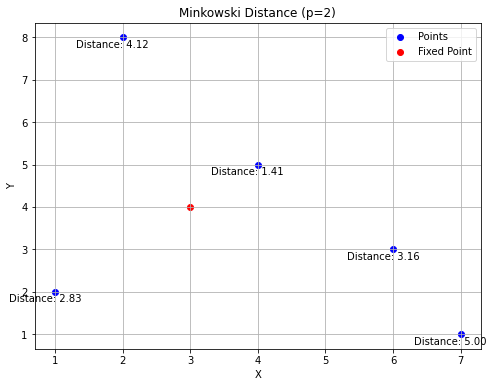

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def minkowski_distance(x, y, p):
    return np.power(np.sum(np.abs(x - y) ** p), 1 / p)

def plot_minkowski_distances(points, fixed_point, p):
    distances = [minkowski_distance(point, fixed_point, p) for point in points]

    plt.figure(figsize=(8, 6))
    plt.scatter(points[:, 0], points[:, 1], color='b', label='Points')
    plt.scatter(fixed_point[0], fixed_point[1], color='r', label='Fixed Point')

    for i, point in enumerate(points):
        plt.annotate(f'Distance: {distances[i]:.2f}', (point[0], point[1]), textcoords="offset points", xytext=(-10,-10), ha='center')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Minkowski Distance (p={p})')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
points = np.array([[1, 2], [4, 5], [6, 3], [2, 8], [7, 1]])
fixed_point = np.array([3, 4])
p = 2  # Order of Minkowski distance (2 for Euclidean distance)

plot_minkowski_distances(points, fixed_point, p)


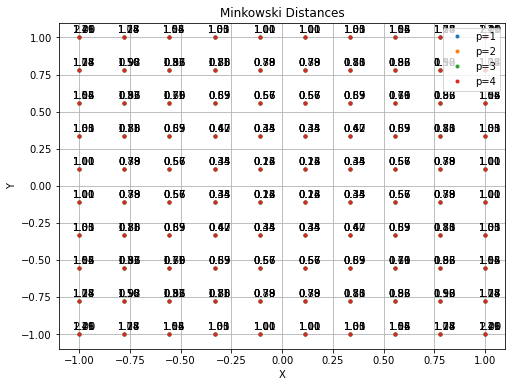

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_minkowski_distance(points, p):
    origin = np.array([0, 0])
    distances = np.power(np.sum(np.abs(points - origin) ** p, axis=1), 1 / p)
    return distances

def plot_minkowski_distances(points, p_values):
    fig, ax = plt.subplots(figsize=(8, 6))

    for p in p_values:
        distances = calculate_minkowski_distance(points, p)
        ax.plot(points[:, 0], points[:, 1], '.', label=f'p={p}')
        for i, distance in enumerate(distances):
            ax.annotate(f'{distance:.2f}', (points[i, 0], points[i, 1]), textcoords="offset points", xytext=(5, 5), ha='center')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Minkowski Distances')
    ax.legend()
    ax.grid(True)
    plt.show()

# Generate points in a square with sides of length 2
x = np.linspace(-1, 1, 10)
y = np.linspace(-1, 1, 10)
points = np.array(np.meshgrid(x, y)).T.reshape(-1, 2)

# Define the values of p to plot
p_values = [1, 2, 3, 4]

# Plot the Minkowski distances
plot_minkowski_distances(points, p_values)


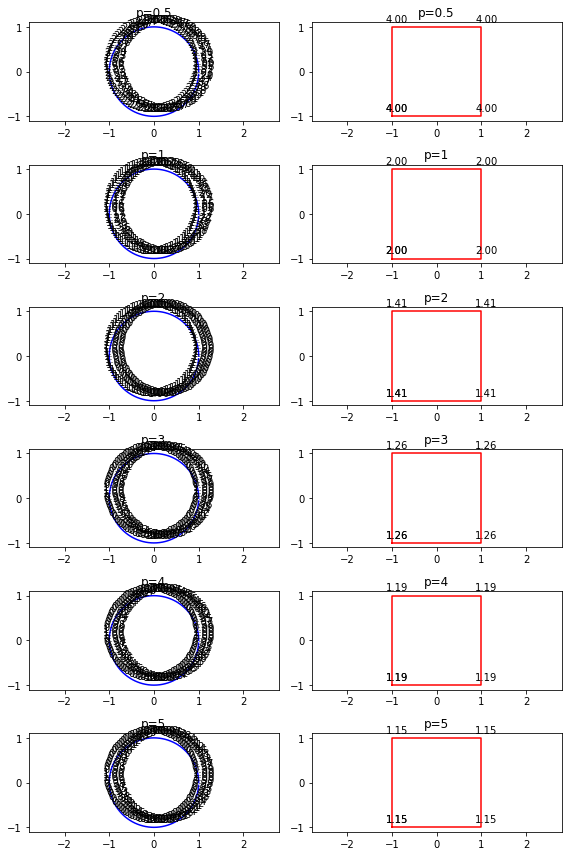

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_minkowski_distance(x, y, p):
    return np.power(np.sum(np.abs(x - y) ** p), 1 / p)

def generate_circle(radius, num_points):
    angles = np.linspace(0, 2 * np.pi, num_points, endpoint=False)
    x = radius * np.cos(angles)
    y = radius * np.sin(angles)
    return np.column_stack((x, y))

def generate_square(length):
    half_length = length / 2
    return np.array([
        [-half_length, -half_length],
        [-half_length, half_length],
        [half_length, half_length],
        [half_length, -half_length],
        [-half_length, -half_length]
    ])

def plot_shapes(p_values):
    num_points = 100
    radius = 1
    length = 2

    circle = generate_circle(radius, num_points)
    square = generate_square(length)

    fig, axs = plt.subplots(len(p_values), 2, figsize=(8, 2 * len(p_values)))

    for i, p in enumerate(p_values):
        distances_circle = [calculate_minkowski_distance(point, np.array([0, 0]), p) for point in circle]
        distances_square = [calculate_minkowski_distance(point, np.array([0, 0]), p) for point in square]

        axs[i, 0].plot(circle[:, 0], circle[:, 1], color='b', label='Circle')
        axs[i, 0].set_title(f'p={p}')
        axs[i, 0].axis('equal')

        axs[i, 1].plot(square[:, 0], square[:, 1], color='r', label='Square')
        axs[i, 1].set_title(f'p={p}')
        axs[i, 1].axis('equal')

        for j, point in enumerate(circle):
            axs[i, 0].annotate(f'{distances_circle[j]:.2f}', (point[0], point[1]), textcoords="offset points", xytext=(5, 5), ha='center')
        
        for j, point in enumerate(square):
            axs[i, 1].annotate(f'{distances_square[j]:.2f}', (point[0], point[1]), textcoords="offset points", xytext=(5, 5), ha='center')

    plt.tight_layout()
    plt.show()

# Define the values of p to plot
p_values = [0.5, 1, 2, 3, 4, 5]

# Plot the shapes with different p values
plot_shapes(p_values)


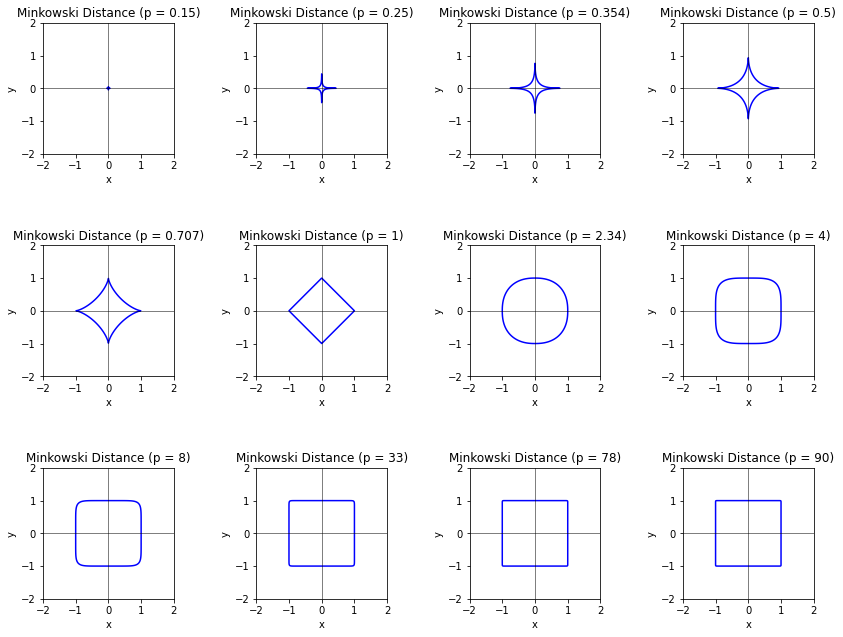

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Range of p values
p_values = [0.15, 0.25, 0.354, 0.5, 0.707, 1, 2.34, 4, 8, 33, 78, 90]

# Define the grid of x and y coordinates
x = np.linspace(-1.2, 1.2, 1000)
y = np.linspace(-1.2, 1.2, 1000)
X, Y = np.meshgrid(x, y)

# Number of rows and columns for subplots
num_rows = 3
num_cols = 4

# Create a figure with subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 10))

# Generate a separate graph for each value of p and plot it in the corresponding subplot
for i, p in enumerate(p_values):
    # Calculate the Minkowski distance for each point from the origin in the grid for the current p value
    distance = np.power(np.power(np.abs(X), p) + np.power(np.abs(Y), p), 1 / p)

    # Determine the row and column index for the current subplot
    row_idx = i // num_cols
    col_idx = i % num_cols

    # Plot the graph in the corresponding subplot
    axs[row_idx, col_idx].contour(X, Y, distance, levels=[1], colors='b')
    axs[row_idx, col_idx].axhline(0, color='black', linewidth=0.5)
    axs[row_idx, col_idx].axvline(0, color='black', linewidth=0.5)
    axs[row_idx, col_idx].set_xlim(-2, 2)
    axs[row_idx, col_idx].set_ylim(-2, 2)
    axs[row_idx, col_idx].set_aspect('equal')
    axs[row_idx, col_idx].set_title(f"Minkowski Distance (p = {p})")
    axs[row_idx, col_idx].set_xlabel("x")
    axs[row_idx, col_idx].set_ylabel("y")

# Adjust the spacing between subplots
fig.tight_layout()
fig.subplots_adjust(hspace=0.7, top=0.9, bottom=0.1)

# Display the figure
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_12092\3905433937.py:13: RuntimeWarning: overflow encountered in power
  distances[:, :, i] = np.power(np.power(np.abs(X), p) + np.power(np.abs(Y), p), 1/p)


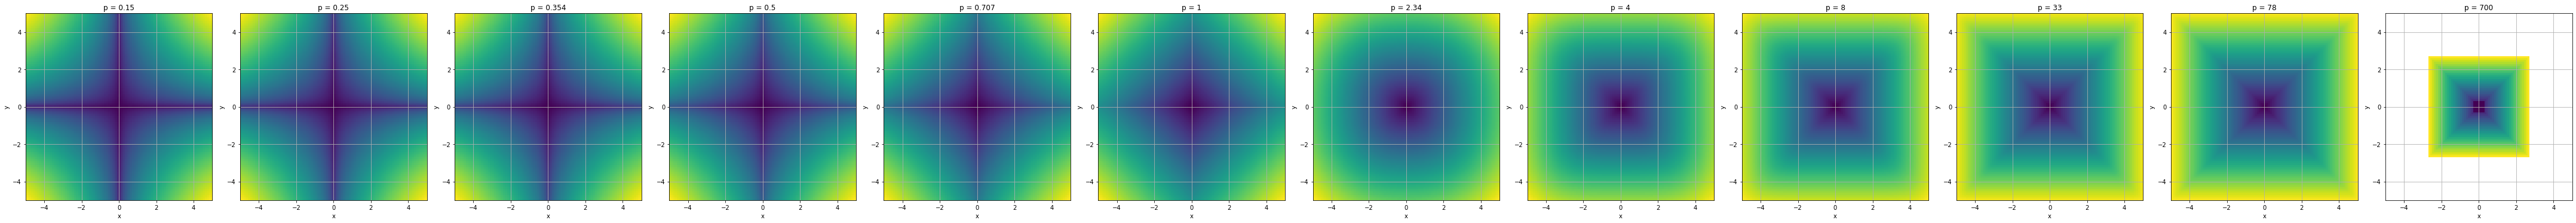

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def plot_minkowski_distances(grid_size, p_values):
    # Create a grid of x and y values
    x = np.linspace(-5, 5, grid_size)
    y = np.linspace(-5, 5, grid_size)
    X, Y = np.meshgrid(x, y)
    
    # Calculate the Minkowski distances for each (x, y) pair and different p values
    distances = np.zeros((grid_size, grid_size, len(p_values)))
    for i, p in enumerate(p_values):
        distances[:, :, i] = np.power(np.power(np.abs(X), p) + np.power(np.abs(Y), p), 1/p)
    
    # Plot the grid of Minkowski distance plots
    fig, axes = plt.subplots(1, len(p_values), figsize=(5*len(p_values), 5))
    for i, ax in enumerate(axes):
        ax.imshow(distances[:, :, i], extent=(-5, 5, -5, 5), origin='lower', cmap='viridis')
        ax.set_title(f'p = {p_values[i]}')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.grid(True)
    
    plt.tight_layout()
    plt.show()

# Example usage
grid_size = 100
p_values = [0.15, 0.25, 0.354, 0.5, 0.707, 1, 2.34, 4, 8, 33, 78, 700]

plot_minkowski_distances(grid_size, p_values)
